# Workshop 4

## Diego Díaz Ayala

## A01770236

In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib
import matplotlib.pyplot as plt



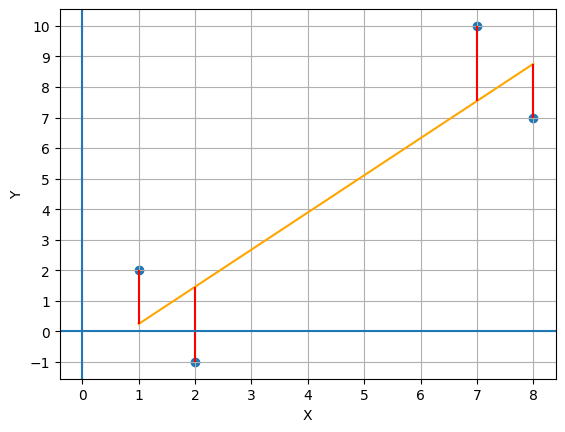

In [2]:

data = {'x':  [1,2,7,8],
        'y': [2,-1,10,7]}
df = pd.DataFrame(data)
b1,b0 = np.polyfit(df.x,df.y,1)
df['yhat'] = b0 + b1*df['x']
#plt.clf()
plt.scatter(df.x,df.y)
plt.plot(df.x, df.yhat,c="orange")
plt.xticks(np.arange(-4,14,1))
plt.yticks(np.arange(-2,11,1))

for i in range(4):
  x=df.x.iloc[i]
  ymin= df.y.iloc[i]
  ymax=df.yhat.iloc[i]
  if (ymin>ymax):
    temp=ymax
    ymax=ymin
    ymin=temp
  plt.vlines(x=x,ymin=ymin,ymax=ymax,color='r')

plt.axhline(y=0)
plt.axvline(x=0)

plt.xlabel("X")
plt.ylabel("Y")
plt.grid()
plt.show()

In [3]:

# Getting price data and selecting adjusted price columns:
sprices = yf.download(['ALFAA.MX','^MXX'],start="2018-01-01",end="2022-07-31", interval="1mo")#, ,interval="m")
sprices = sprices['Adj Close']

# Calculating returns:
sr = np.log(sprices) - np.log(sprices.shift(1))
# Deleting the first month with NAs:
sr=sr.dropna()
sr.columns=['ALFAAret','MXXret']



[*********************100%%**********************]  2 of 2 completed


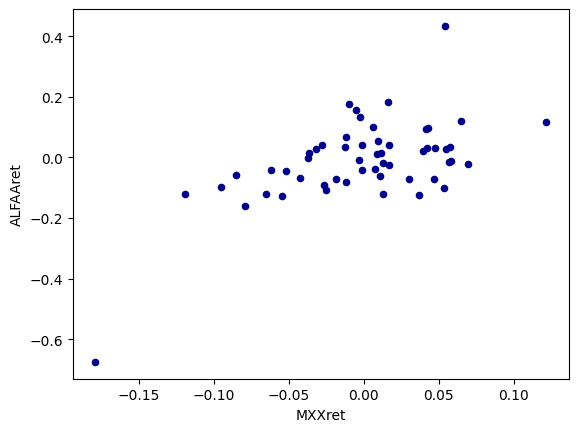

In [4]:
sr.plot.scatter(x='MXXret', y='ALFAAret',c='DarkBlue')
plt.show()

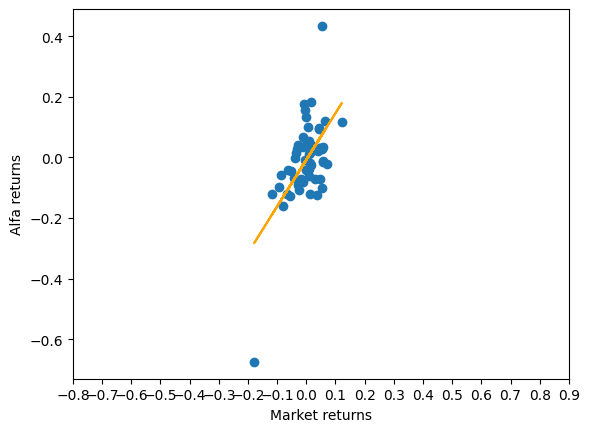

In [5]:
plt.clf()
x=sr['MXXret']
y = sr['ALFAAret']
plt.scatter(x, y)
# Now I add the regression line:
# The polyfit function actually calculates the beta0 and beta1 of the linear regression line:
b1,b0 = np.polyfit(x,y,1)
# With the beta coefficients I calculated the predicted line (yfit)
yfit = b0+b1*x
plt.plot(x, yfit,c="orange")
# I change the range for X trying to make both axis moving in the same range:
plt.xticks(np.arange(-0.80,1,0.1))
# I label the axis:
plt.xlabel("Market returns")
plt.ylabel("Alfa returns")

plt.show()

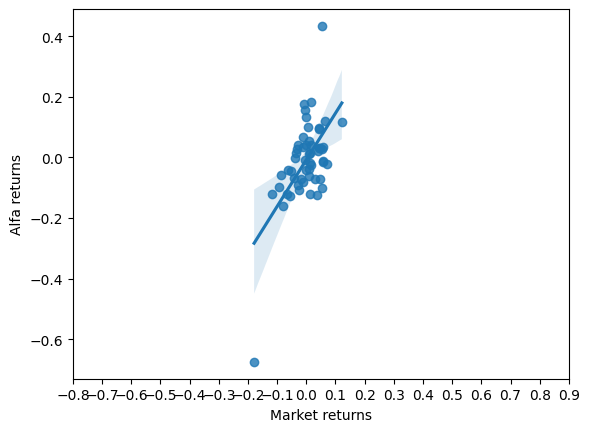

In [6]:
# Another faster way to plot a scatter and the regression line:
# I use the seaborn library:
import seaborn as sns
plt.clf()
sns.regplot(x=x,y=y)
plt.xticks(np.arange(-0.80,1,0.1))
plt.xlabel("Market returns")
plt.ylabel("Alfa returns")

plt.show()

In [7]:
import statsmodels.api as sm
# I add a column of 1's to the X dataframe in order to include the beta0 coefficient (intercept) in the model:
X = sm.add_constant(x)
# I estimate the OLS regression model:
mkmodel = sm.OLS(y,X).fit()
# I display the summary of the regression: 
print(mkmodel.summary())

                            OLS Regression Results                            
Dep. Variable:               ALFAAret   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     28.13
Date:                Wed, 30 Aug 2023   Prob (F-statistic):           2.36e-06
Time:                        08:55:23   Log-Likelihood:                 42.633
No. Observations:                  54   AIC:                            -81.27
Df Residuals:                      52   BIC:                            -77.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0080      0.015     -0.522      0.6

In [8]:
# I can also run the OLS regression using the ols function 
import statsmodels.formula.api as smf

mkmodel2 = smf.ols('ALFAAret ~ MXXret',data=sr).fit()
# This function does not require to add the column of 1's to include the intercept!
print(mkmodel2.summary())

                            OLS Regression Results                            
Dep. Variable:               ALFAAret   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.339
Method:                 Least Squares   F-statistic:                     28.13
Date:                Wed, 30 Aug 2023   Prob (F-statistic):           2.36e-06
Time:                        08:55:23   Log-Likelihood:                 42.633
No. Observations:                  54   AIC:                            -81.27
Df Residuals:                      52   BIC:                            -77.29
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0080      0.015     -0.522      0.6

In [9]:
# Using matrix algebra to estimate the beta coefficients:
# I add the column of 1's to the dataframe:
sr['constant'] = 1
selcols = ['constant','MXXret']
# I set x as a matrix with the column of 1's and the values of X:
x = sr[selcols].values
# I set y as the dependent variable:
y = sr['ALFAAret'].values
# I calculate the matrix multiplication X'X:
xtx = np.matmul(x.transpose(),x)
# I calculate the matrix multiplication X'Y:
xty = np.matmul(x.transpose(),y)
# I get the inverse of the matrix (X'X) to solve for the beta coefficients:
invtxt = np.linalg.inv(xtx)
# I multiply inv(X'X)*X'Y to get the estimation of the beta vector (beta0 and beta1 coefficients) 
betas = np.matmul(invtxt,xty)
betas

array([-0.00795217,  1.53870372])

In [10]:
# Getting price data and selecting adjusted price columns:
sprices = yf.download("ALFAA.MX ^MXX",start="2010-01-01",interval="1mo")
sprices = sprices['Adj Close']

# Calculating returns:
sr = np.log(sprices) - np.log(sprices.shift(1))
# Deleting the first month with NAs:
sr=sr.dropna()
sr.columns=['ALFAAret','MXXret']

[*********************100%%**********************]  2 of 2 completed


In [11]:
from statsmodels.regression.rolling import RollingOLS
x=sm.add_constant(sr['MXXret'])
y = sr['ALFAAret']
rolreg = RollingOLS(y,x,window=36).fit()
betas = rolreg.params
# I check the last pairs of beta values:
betas.tail()

,const,MXXret
Date,,
2023-04-01,-0.001468,0.511303
2023-05-01,-0.008061,0.567690
2023-06-01,-0.010652,0.538511
2023-07-01,-0.009793,0.518701
2023-08-01,-0.011264,0.525456


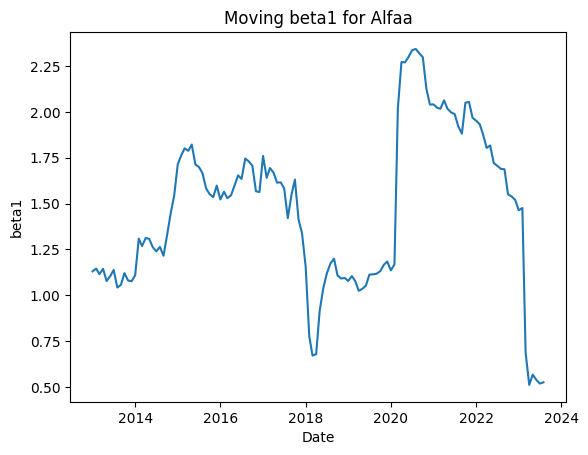

In [12]:
plt.clf()
plt.plot(betas['MXXret'])
plt.title('Moving beta1 for Alfaa')
plt.xlabel('Date')
plt.ylabel('beta1')
plt.show()

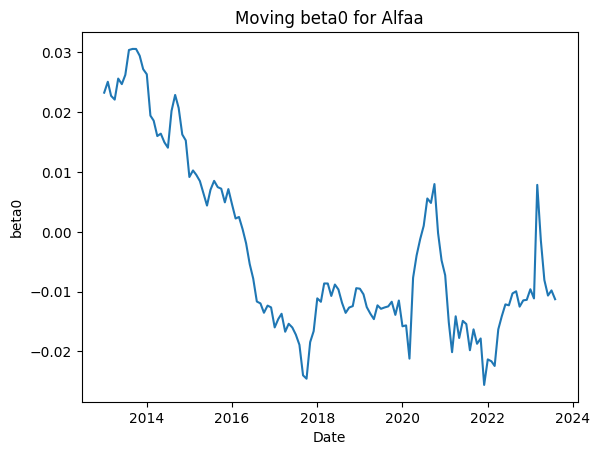

In [13]:
plt.clf()
plt.plot(betas['const'])
plt.title('Moving beta0 for Alfaa')
plt.xlabel('Date')
plt.ylabel('beta0')
plt.show()

In [14]:
betas.describe()

,const,MXXret
count,128.000000,128.000000
mean,-0.003207,1.471232
std,0.014985,0.432726
min,-0.025598,0.511303
25%,-0.013744,1.120297
50%,-0.009868,1.537207
75%,0.007282,1.749341
max,0.030594,2.343574


PODEMOS VER QUE HAY MUCHAS DIFERENCIAS ENTRE AMBOS MÉTODOS TANTO EN LAS REGRESIONES CONSTANTES Y LAS MÓVILES, TAMBIÉN SE PUEDES VER DIFERENCIAS GRANDES ENTRE LAS DESVIACIONES ESTANDAR Y LAS MEDIAS. ESTO SE PUEDE DEBER PRINCIPALMENTE A QUE LAS REGRESIONES SE TOMARON EN TIEMPOS DIFERENTES DE TIEMPO.